In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [59]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)
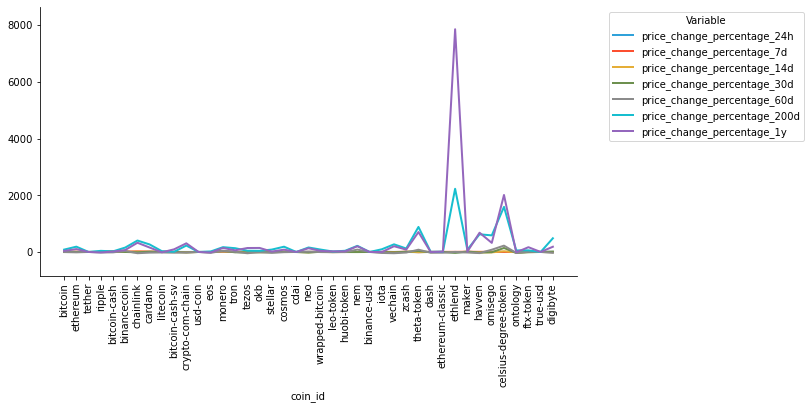

In [102]:
# Plot your data to see what's in your DataFrame
hvplot.extension('matplotlib')  # Use matplotlib for static rendering
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

---

### Prepare the Data

In [61]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", 
                                                                    "price_change_percentage_7d", 
                                                                    "price_change_percentage_14d", 
                                                                    "price_change_percentage_30d", 
                                                                    "price_change_percentage_60d", 
                                                                    "price_change_percentage_200d", 
                                                                    "price_change_percentage_1y"]])
market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [62]:
# Create a DataFrame with the scaled data
df_market_data_transformed = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h", 
                                                                    "price_change_percentage_7d", 
                                                                    "price_change_percentage_14d", 
                                                                    "price_change_percentage_30d", 
                                                                    "price_change_percentage_60d", 
                                                                    "price_change_percentage_200d", 
                                                                    "price_change_percentage_1y"])

# Create a coin_id column in the df_market_data_transformed DataFrame
# using the index of the original df_market_data DataFrame
df_market_data_transformed["coin_id"] = df_market_data.index

# Set the newly created coin_id column as index of the df_market_data_transformed DataFrame
df_market_data_transformed = df_market_data_transformed.set_index("coin_id")

# Display sample data
df_market_data_transformed.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [63]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [64]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_transformed)
    inertia.append(k_model.inertia_)

In [95]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


:Curve   [k]   (inertia)
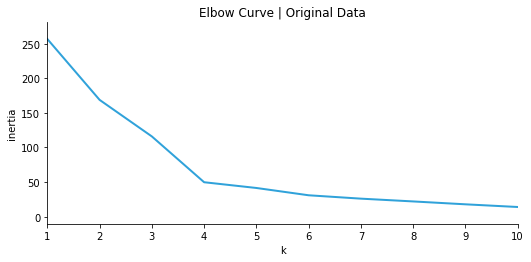

In [103]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
hvplot.extension('matplotlib')  # Use matplotlib for static rendering
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve | Original Data", 
    xticks=k
)

elbow_plot

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [67]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [68]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_transformed)

KMeans(n_clusters=4, random_state=0)

In [69]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_market_data_transformed)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [70]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_transformed.copy()

In [71]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions["cluster"] = clusters

# Display sample data
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
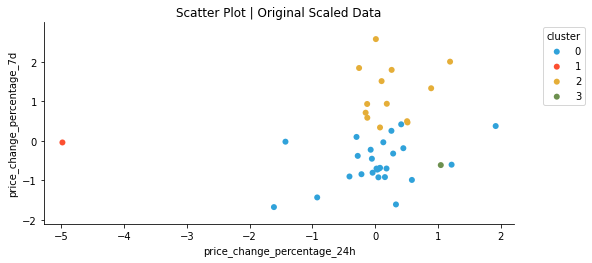

In [104]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
hvplot.extension('matplotlib')  # Use matplotlib for static rendering
scatter_plot_predictions = df_market_data_predictions.hvplot.scatter(
    title= "Scatter Plot | Original Scaled Data",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster"
)
scatter_plot_predictions

---

### Optimize Clusters with Principal Component Analysis.

In [72]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [73]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
market_pca = pca.fit_transform(df_market_data_transformed)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [74]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 88% of the total variance is condensed into the 3 PCA variables.

In [75]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(
    market_pca,
    columns =["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original data
df_market_pca["coin_id"] = df_market_data_transformed.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [85]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [106]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

In [107]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k,
    'Inertia': inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,Inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


:Curve   [k]   (Inertia)
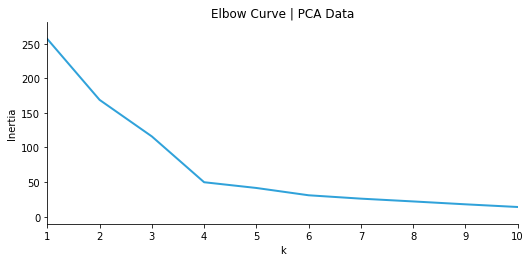

In [108]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
hvplot.extension('matplotlib')  # Use matplotlib for static rendering
pca_elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="Inertia", 
    title="Elbow Curve | PCA Data", 
    xticks=k
)

pca_elbow_plot

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This does not differ from the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [80]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [81]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

KMeans(n_clusters=4, random_state=0)

In [82]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_segments_pca = model.predict(df_market_pca)

# Print the resulting array of cluster values.
print(crypto_segments_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [83]:
# Create a copy of the DataFrame with the PCA data
market_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_predictions["CryptoClusters"] = crypto_segments_pca

# Display sample data
market_pca_predictions.head()

,PC1,PC2,PC3,CryptoClusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


:NdOverlay   [CryptoClusters]
   :Scatter   [PC1]   (PC2,coin_id)
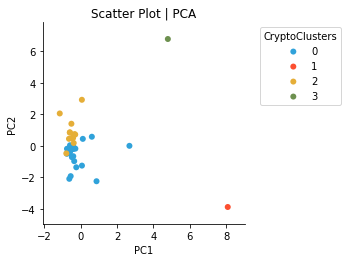

In [109]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
hvplot.extension('matplotlib')  # Use matplotlib for static rendering
pca_predictions_scatter_plot = market_pca_predictions.hvplot.scatter(
    title='Scatter Plot | PCA',
    x='PC1',
    y='PC2',
    by='CryptoClusters',
    hover_cols=['coin_id'],
    frame_width=700,
    frame_height=500
)

pca_predictions_scatter_plot

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (Inertia)
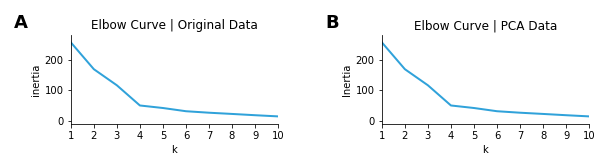

In [110]:
# Composite plot to contrast the Elbow curves
elbow_plot + pca_elbow_plot

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [CryptoClusters]
      :Scatter   [PC1]   (PC2,coin_id)
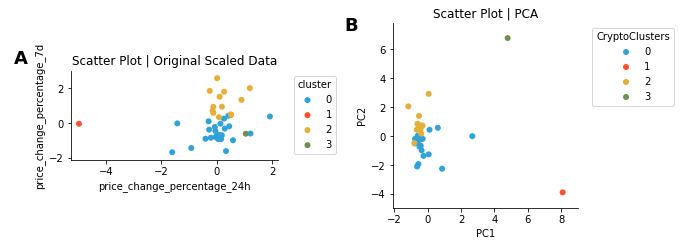

In [111]:
# Composite plot to contrast the clusters
scatter_plot_predictions + pca_predictions_scatter_plot

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 	Using fewer features (via PCA) can lead to more efficient clustering with clearer groupings. It helps eliminate noise, but some fine-grained distinctions between cryptocurrencies may be lost.
	
  The original feature set may provide more detailed clusters, but with more noise and computational complexity, making the clusters harder to generalize.
	
  Ultimately, the trade-off between using more features versus PCA comes down to whether we prioritize interpretability and detail (more features) or efficiency and robustness (fewer features).